### Data Preparation

-------

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from time import time

In [2]:
% matplotlib inline
#import scikitplot
#import scikitplot.plotters as skplt

---------

### Get Data

In [3]:
import os
txt_files = os.listdir("./data/txt")[1:]

In [4]:
txt_files[0:10]

['17803823.txt',
 '18561524.txt',
 '19214295.txt',
 '19860006.txt',
 '19860007.txt',
 '20146086.txt',
 '21129213.txt',
 '21254744.txt',
 '21308977.txt',
 '21477357.txt']

In [5]:
wrd = []
for file in txt_files:
    with open('./data/txt/' + file) as f:
        for line in f:
            words = line.split()
            #print(line.split())
            for item in words:
                wrd.append(item)

In [6]:
len(wrd)

43751

### Bag of Words

In [7]:
def df_creater(words):
    unique_wrd = set(words)
    
    
    count = []
    for term in unique_wrd:
        n = 0
        for another_term in words:
            if another_term  == term:
                n = n+1
        count.append([term,n])
    cnt = pd.DataFrame(count, columns = ["term","values"])
    cnt = cnt.sort_values(by = ['values'],ascending=False)
    ndf = pd.DataFrame(index = cnt['term'])
    ndf["values"] = np.array(cnt["values"], dtype = float)
    
    return ndf

In [8]:
ndf = df_creater(wrd)

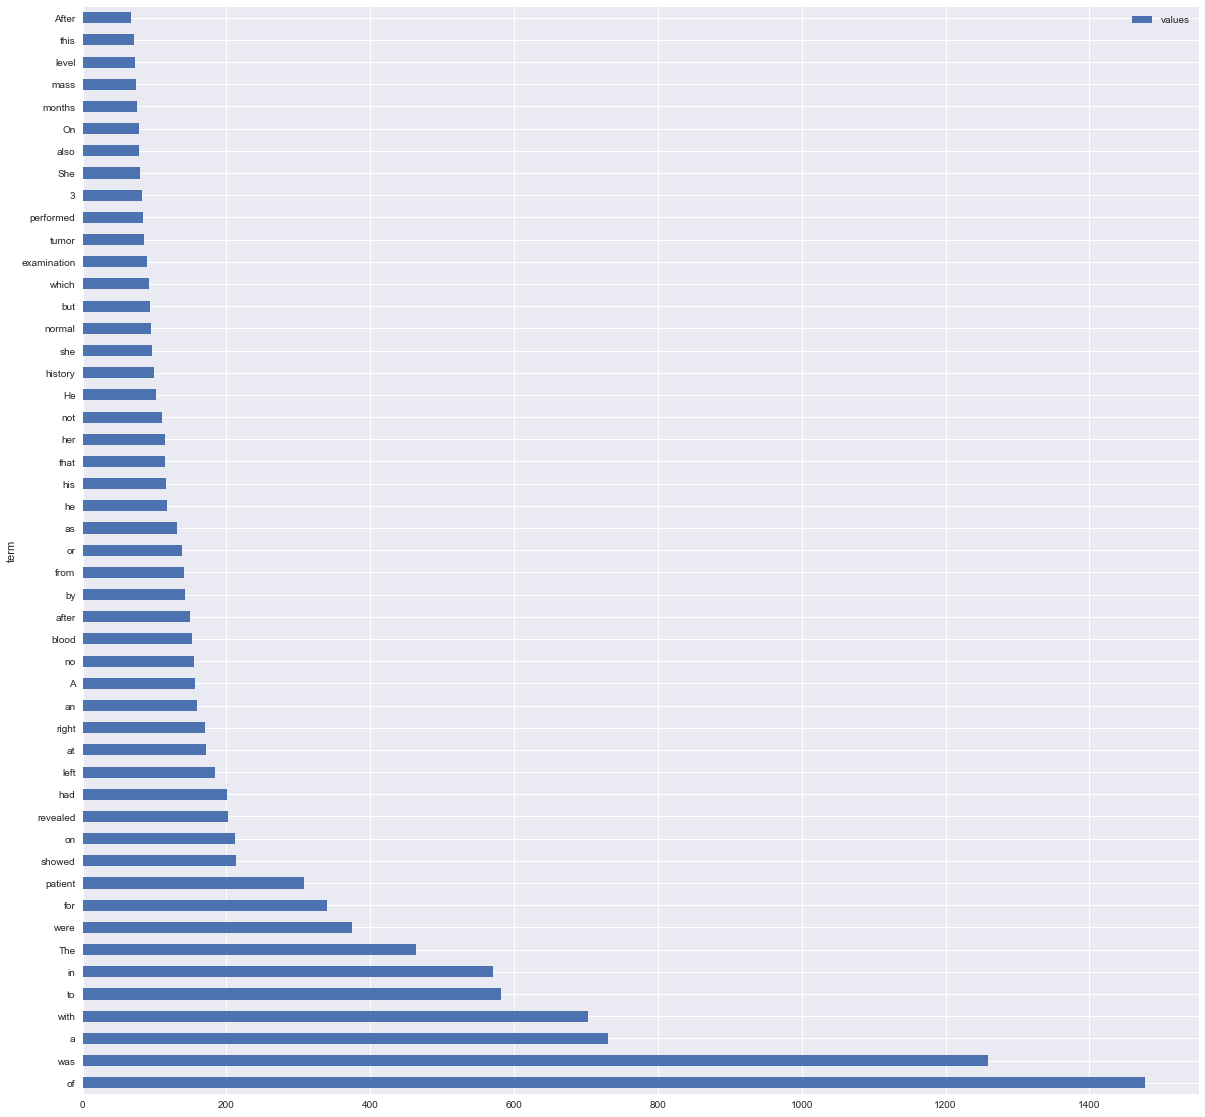

In [16]:
ndf = ndf[1:50]
ndf.plot.barh(stacked=False,figsize=(20,20) )

In [22]:
cut_ndf = ndf[ndf["values"]<100]

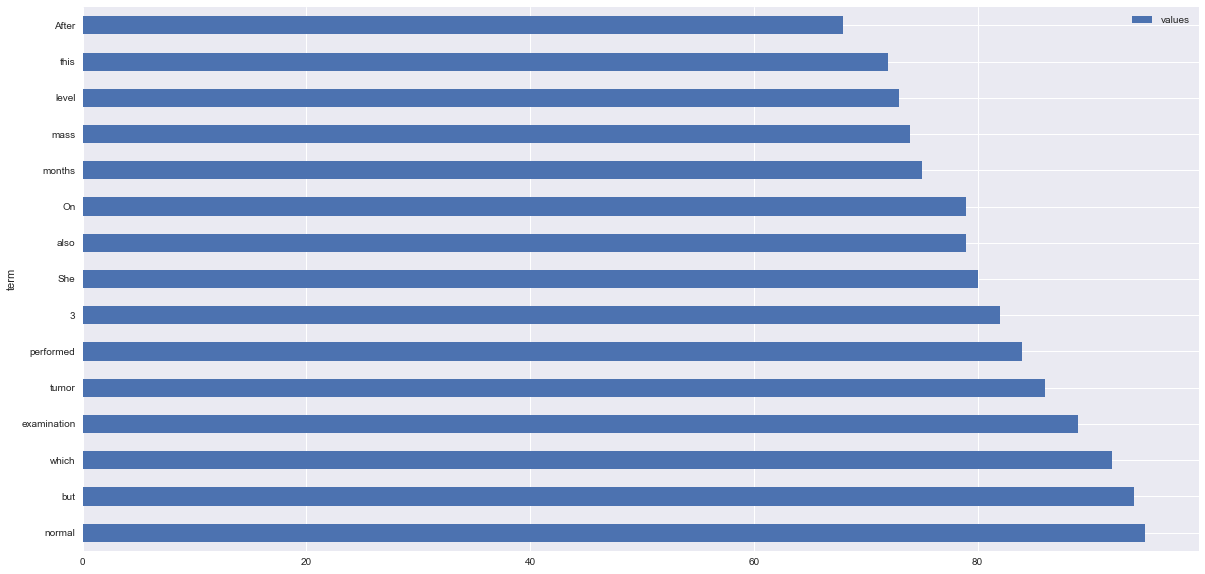

In [24]:
cut_ndf = cut_ndf[1:50]
cut_ndf.plot.barh(stacked=False,figsize=(20,10) )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b1aa6d68>]], dtype=object)

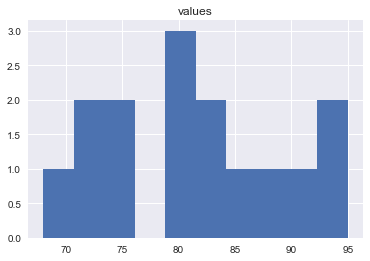

In [28]:
cut_ndf.hist()

### TFIDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [13]:
tfidf_vectorizer = TfidfVectorizer(analyzer="word",
                                   tokenizer=nltk.word_tokenize,
                                   preprocessor=None,
                                   stop_words='english',
                                   max_features=None)
sparce_tfidf = tfidf_vectorizer.fit_transform(wrd)

In [14]:
sparce_tfidf.shape

(43751, 7048)

In [15]:
tfidf = sparce_tfidf.toarray()
tfidf.shape

(43751, 7048)

### Word2Vec